#**EDA - 1**

In [ ]:
Here is the dataset link: https://drive.google.com/file/d/1iKy23bMtEQShF_weneRNnYrFmzvpPOI3/view
The dataset provided focuses on used bikes, capturing various attributes to analyze the second-hand bike
market. This dataset helps understand factors influencing resale prices, usage patterns, and market trends for
used bikes.

#**Title: Bike Details Dataset**

#Source:

The dataset is available on Kaggle, simulating data commonly observed in real-world online bike resale
platforms.


#Description:

The dataset comprises 1061 records of used bike listings. These records include details about the bike's brand
and model, selling price, kilometers driven, ownership history, and other attributes. It is particularly useful for
resale value prediction, market analysis, and understanding buyer preferences.

#**Title: Bike Details Dataset**

The dataset consists of 7 features, combining both numeric and categorical data, offering a comprehensive
view of the second-hand bike market.
 =name: Brand and model name of the bike (Categorical, e.g., "Royal Enfield Classic 350", "Honda Dio")Z
selling_price: Listed selling price in INR (Numeric, e.g., 175000, 45000)Z
 year: Manufacturing year of the bike (Numeric, e.g., 2019, 2015)Z
 seller_type: Seller category, either "Individual" or "Dealer" (Categorical)Z
 owner: Ownership history, e.g., "1st owner", "2nd owner" (Categorical)Z
 km_driven: Total kilometers driven (Numeric, in km, e.g., 12000, 23000)Z
 ex_showroom_price: Original showroom price in INR (Numeric, e.g., 148114.0, 89643.0, etc,.).

#**Questions:**


**1.What is the range of selling prices in the dataset?**


In [ ]:
from google.colab import files
uploaded = files.upload("bike_data")

Saving bike_data.csv to bike_data/bike_data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bike_data.csv')

In [ ]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
print("Range of selling prices:", df['selling_price'].max() - df['selling_price'].min())

Range of selling prices: 755000


**2.What is the median selling price for bikes in the dataset?**


In [ ]:
df['selling_price'].median()


45000.0

**3.What is the most common seller type?**


In [ ]:
df['seller_type'].mode()[0]


'Individual'

**4.How many bikes have driven more than 50,000 kilometers?**


In [ ]:
df[df['km_driven'] > 50000].shape[0]


170

**5.What is the average km_driven value for each ownership type?**


In [ ]:
df.groupby('owner')['km_driven'].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


**6.What proportion of bikes are from the year 2015 or older?**


In [ ]:
df.groupby('owner')['km_driven'].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


**7.What is the trend of missing values across the dataset?**


In [ ]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


**8.What is the highest ex_showroom_price recorded, and for which bike?**


In [ ]:
df['ex_showroom_price'].max()

1278000.0

**9.What is the total number of bikes listed by each seller type?**


In [ ]:
df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


**10. What is the relationship between selling_price and km_driven for first-owner bikes?**

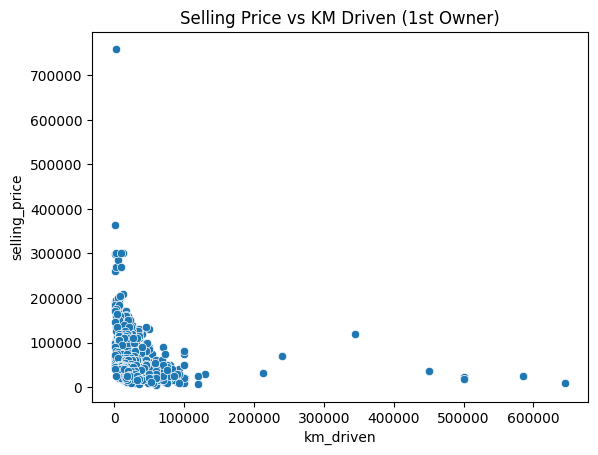

In [ ]:
first_owner_df = df[df['owner'].str.contains('1st')]
sns.scatterplot(x='km_driven', y='selling_price', data=first_owner_df)
plt.title("Selling Price vs KM Driven (1st Owner)")
plt.show()

**11.Identify and remove outliers in the km_driven column using the IQR method.**


In [ ]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df[(df['km_driven'] >= Q1 - 1.5*IQR) & (df['km_driven'] <= Q3 + 1.5*IQR)]
filtered_df.shape[0]

1022

**12.Perform a bivariate analysis to visualize the relationship between year and selling_price.**


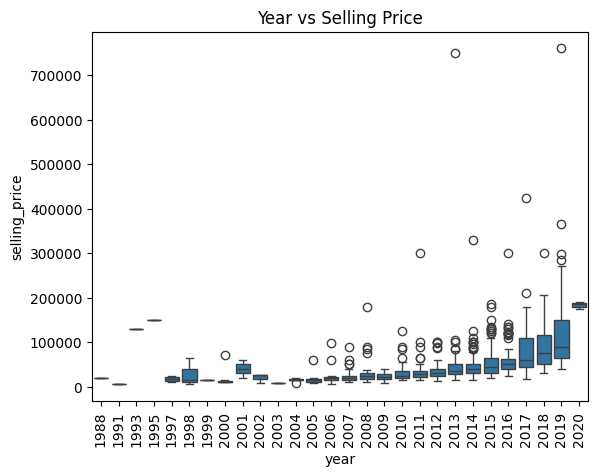

In [ ]:
sns.boxplot(x='year', y='selling_price', data=df)
plt.xticks(rotation=90)
plt.title("Year vs Selling Price")
plt.show()

**13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?**


In [ ]:
df['age'] = 2025 - df['year']
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']
avg_depreciation_by_age = df.groupby('age')['depreciation'].mean()
avg_depreciation_by_age

,depreciation
age,
5,-34260.000000
6,2954.562500
7,13023.194805
8,22306.082353
9,28328.190476
10,28013.275000
11,34505.606061
12,43086.886792
13,37317.648649


**14.Which bike names are priced significantly above the average price for their manufacturing year?**


In [ ]:
mean_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()
merged = df.merge(mean_price_by_year, on='year', suffixes=('', '_year_avg'))
outliers = merged[merged['selling_price'] > merged['selling_price_year_avg'] * 1.5]
outliers[['name', 'year', 'selling_price']]

,name,year,selling_price
2,Royal Enfield Classic Gunmetal Grey,2018,150000
7,Royal Enfield Bullet 350 [2007-2011],2008,180000
13,Yamaha YZF R3,2019,365000
18,Royal Enfield Classic Gunmetal Grey,2018,150000
23,Jawa Standard,2019,180000
...,...,...,...
979,Royal Enfield Thunder 500,2015,105000
981,Royal Enfield Thunder 350,2013,105000
983,Royal Enfield Classic 350,2015,100000
984,Royal Enfield Classic 500,2014,95000


**15.Develop a correlation matrix for numeric columns and visualize it using a
heatmap.**

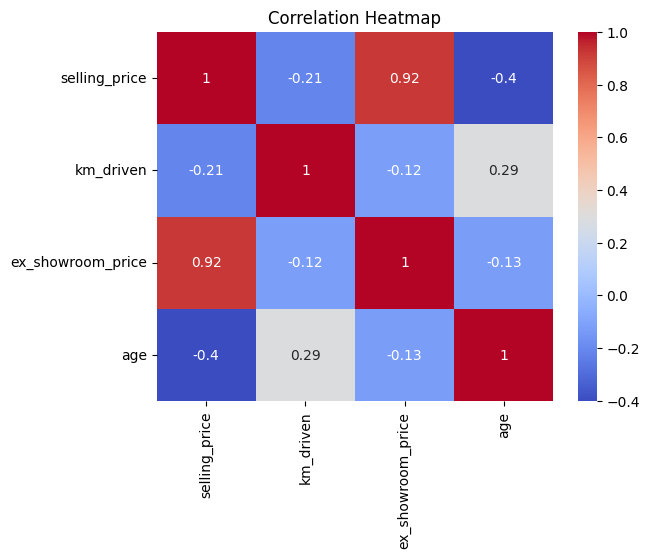

In [ ]:
correlation = df[['selling_price', 'km_driven', 'ex_showroom_price', 'age']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#**EDA - 2**

#**About - Dataset:**

**Title: Car Sale Dataset**
Here is the dataset link: https://drive.google.com/file/d/1N0kM_zi-iU3yvr6BEJf21aiF599PtA0U/view
The dataset provided focuses on used car sales, capturing various attributes to analyze the second-hand car
market. This dataset provides insights into factors affecting resale value, trends in the used car industry, and
consumer behavior.

 **Car Sales**

**Source:**

The dataset is available on Kaggle, representing data commonly seen in online car resale platforms.


**Description:**

The dataset contains details about used cars listed for sale, such as brand, model, selling price, kilometers
driven, fuel type, and transmission type. This information is valuable for predictive modeling, market analysis,
and understanding customer preferences.

#**Features:**


Car_id: A unique identifier for each car in the dataset, helping to track individual car entries.
Date: The date when the car sale transaction took place, formatted as YYYY-MM-DD.
Customer Name: The name of the customer who purchased the car, represented as a string.
Gender: The gender of the customer, categorized as "Male" or "Female.
Annual Income: The customer's annual income in US dollars, represented as a numeric value.
Dealer_Name: The name of the dealership selling the car, represented as a string.
Company: The manufacturer or brand name of the car, such as "Toyota," "Ford," etc.
Model: The specific model name of the car, such as "Corolla," "Civic," etc.
Engine: The engine type of the car, such as "V6," "I4," etc.
Transmission: The type of transmission in the car, either "Manual" or "Automatic.
Color: The color of the car, represented as a string (e.g., "Red," "Blue")
Price ($): The selling price of the car in US dollars.
Dealer_No: A unique identifier for each car dealer in the dataset
 Body Style: The body style of the car, such as "Sedan," "SUV," etc
Phone: The phone number of the customer who purchased the car
 Dealer_Region: The geographical region of the car dealer, such as "North," "South," etc

#**Questions**

**1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?**



In [ ]:
from google.colab import files
uploaded = files.upload("car_sale")

Saving car_sale.csv to car_sale/car_sale.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('car_sale.csv')

In [ ]:
df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

,Price ($)
Dealer_Name,
U-Haul CO,28769.919006
Classic Chevy,28602.014446
Rabun Used Car Sales,28527.536177
Iceberg Rentals,28522.958533
Enterprise Rent A Car,28312.580800
Scrivener Performance Engineering,28297.371589
Gartner Buick Hyundai Saab,28247.621019
Saab-Belle Dodge,28190.139888
Capitol KIA,28189.703822


**2.Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?**


In [ ]:
df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

,Price ($)
Company,
Lincoln,19658.050211
Saab,19653.740089
Cadillac,19517.120220
Plymouth,19065.997338
Lexus,17852.923492
Buick,17142.232626
Mercury,16445.172195
Nissan,16214.264017
Saturn,15990.223671


**3.What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?**


<Axes: xlabel='Transmission', ylabel='Price ($)'>

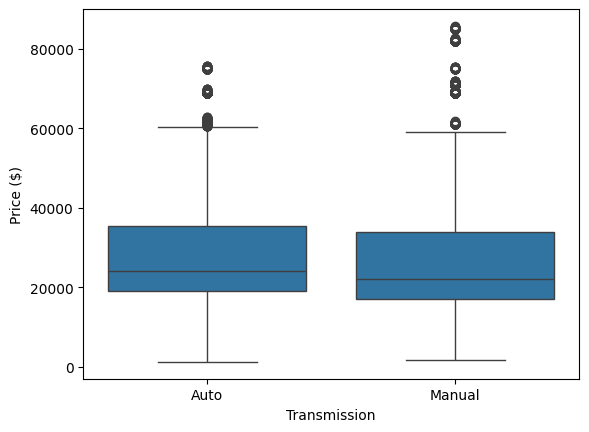

In [ ]:
sns.boxplot(x='Transmission', y='Price ($)', data=df)

**4.What is the distribution of car prices across different regions?**


<Axes: xlabel='Dealer_Region', ylabel='Price ($)'>

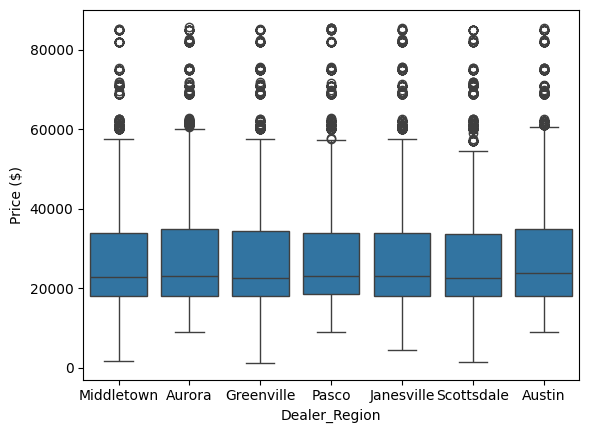

In [ ]:
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)

**5.What is the distribution of cars based on body styles?**


<Axes: xlabel='Body Style'>

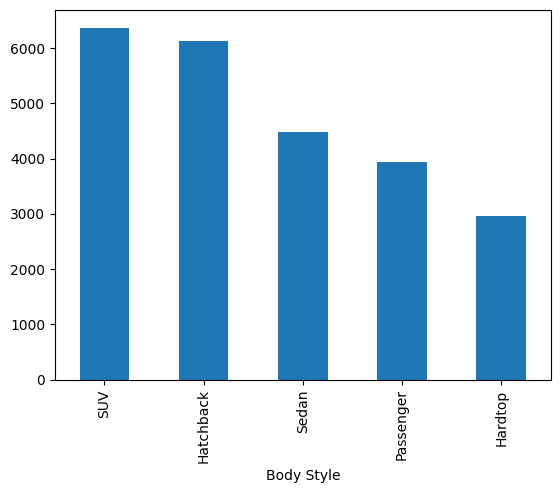

In [ ]:
df['Body Style'].value_counts().plot(kind='bar')

**6.How does the average selling price of cars vary by customer gender and annual income?**


In [ ]:
df.groupby('Gender')[['Price ($)', 'Annual Income']].mean()

,Price ($),Annual Income
Gender,,
Female,28277.265270,755973.021339
Male,28039.429407,851184.044207


**7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?**


In [ ]:
df.groupby('Dealer_Region')['Price ($)'].agg(['mean', 'count'])

,mean,count
Dealer_Region,,
Aurora,28334.626837,3130
Austin,28341.603628,4135
Greenville,28180.819054,3128
Janesville,27833.350955,3821
Middletown,27856.338875,3128
Pasco,28119.039923,3131
Scottsdale,27954.958928,3433


**8.How does the average car price differ between cars with different engine sizes?**


<Axes: xlabel='Engine', ylabel='Price ($)'>

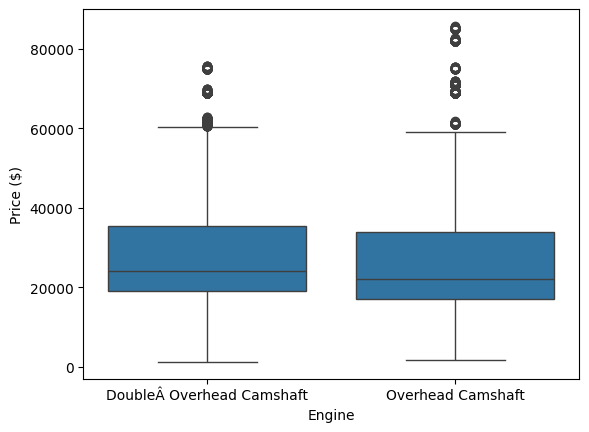

In [ ]:
sns.boxplot(x='Engine', y='Price ($)', data=df)

**9.How do car prices vary based on the customer's annual income bracket?**


<Axes: xlabel='Income_Bracket', ylabel='Price ($)'>

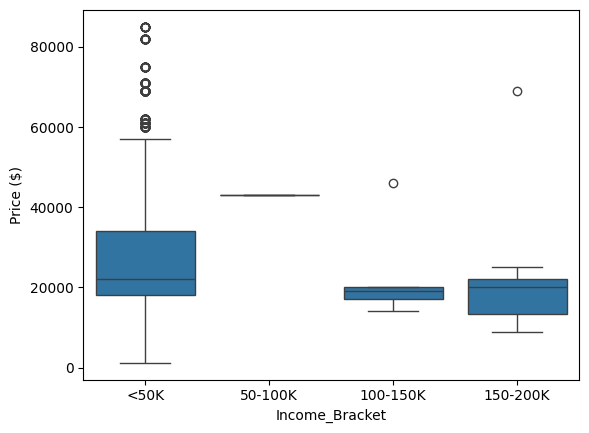

In [ ]:
df['Income_Bracket'] = pd.cut(df['Annual Income'], bins=[0,50000,100000,150000,200000], labels=['<50K','50-100K','100-150K','150-200K'])
sns.boxplot(x='Income_Bracket', y='Price ($)', data=df)

**10.What are the top 5 car models with the highest number of sales, and how does their price distribution look?**


<Axes: xlabel='Model', ylabel='Price ($)'>

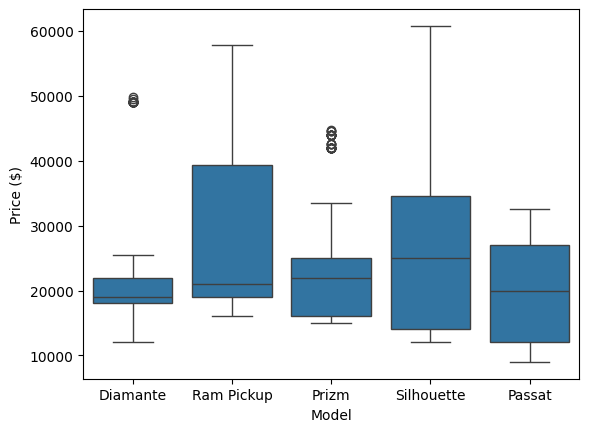

In [ ]:
top_models = df['Model'].value_counts().nlargest(5).index
sns.boxplot(x='Model', y='Price ($)', data=df[df['Model'].isin(top_models)])

**11.How does car price vary with engine size across different car colors, and which colors have the highest price variation?**


<Axes: xlabel='Color', ylabel='Price ($)'>

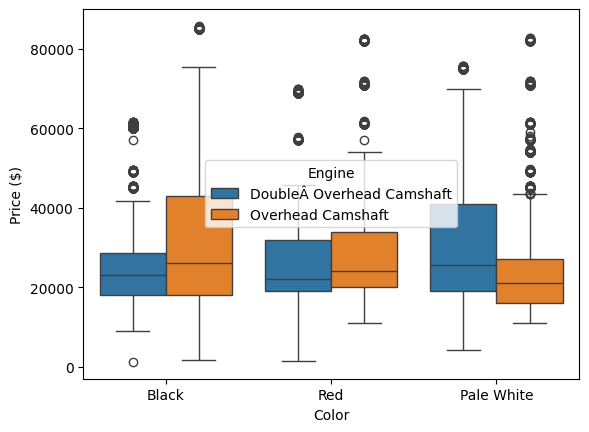

In [ ]:
sns.boxplot(x='Color', y='Price ($)', hue='Engine', data=df)

**12.Is there any seasonal trend in car sales based on the date of sale?**


<Axes: xlabel='Year,Month'>

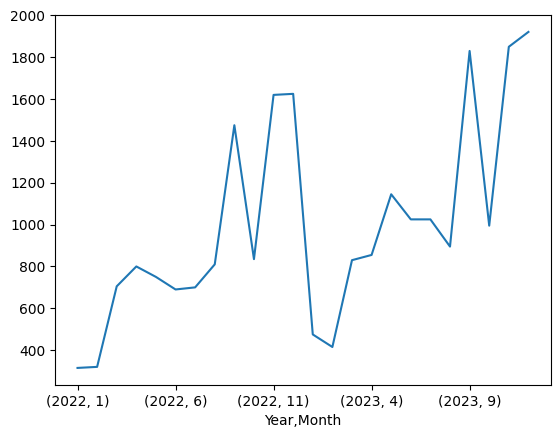

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.groupby(['Year', 'Month']).size().plot(kind='line')

**13.How does the car price distribution change when considering different bcombinations of body style and transmission type?**


<Axes: xlabel='Body Style', ylabel='Price ($)'>

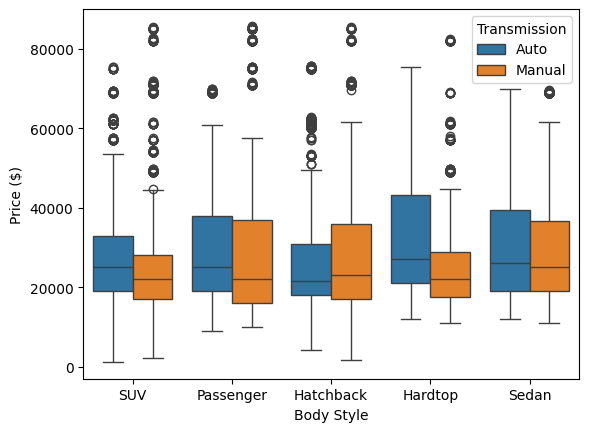

In [ ]:
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df)

**14.What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?**


<Axes: >

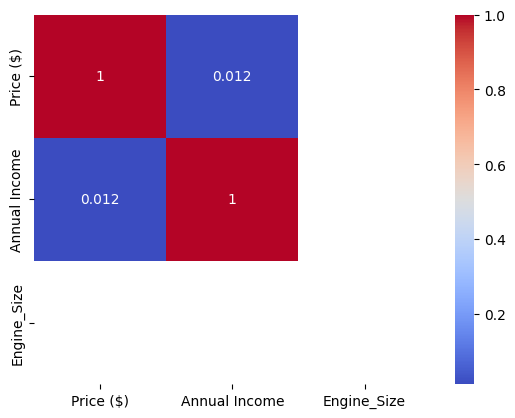

In [ ]:
df['Engine_Size'] = df['Engine'].str.extract('(\d+)').astype(float)
df_corr = df[['Price ($)', 'Annual Income', 'Engine_Size']].corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

**15.How does the average car price vary across different car models and engine types?**

In [ ]:
df.groupby(['Model', 'Engine'])['Price ($)'].mean().sort_values(ascending=False).head(10)

,,Price ($)
Model,Engine,
SC,Overhead Camshaft,61074.818182
Ranger,DoubleÂ Overhead Camshaft,61064.055556
Sable,Overhead Camshaft,61039.770833
Catera,DoubleÂ Overhead Camshaft,56836.933333
LX470,Overhead Camshaft,54037.490196
LS400,Overhead Camshaft,53157.941558
GS400,Overhead Camshaft,53086.000000
Tacoma,DoubleÂ Overhead Camshaft,53085.821918
Aurora,Overhead Camshaft,51833.556962


#**EDA - 3**

Amazon Sales Data

**Description:**

This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.



**Features:**

product_id: Unique identifier for each product
product_name: Name of the product
category: Category of the product
discounted_price: Discounted price of the product
actual_price: Actual price of the product
discount_percentage: Percentage of discount for the product
rating: Rating of the product (1-5)
rating_count: Number of people who voted for the Amazon rating
about_product: Description about the product
user_id: ID of the user who wrote the review
user_name: Name of the user who wrote the review
review_id: ID of the user review
review_title: Short review
review_content: Long review
img_link: Image link of the product
product_link: Official website link of the product

**Source:**

#**Questions**

**1.What is the average rating for each product category?**


In [ ]:
from google.colab import files
uploaded = files.upload("amazon")

Saving amazon.csv to amazon/amazon.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_amazon = pd.read_csv('amazon.csv')

In [ ]:
avg_rating_per_category = df_amazon.groupby('category')['rating'].mean().sort_values(ascending=False)
avg_rating_per_category.head(10)

**2.What are the top rating_count products by category?**


In [ ]:
top_rated_by_count = df_amazon.sort_values('rating_count', ascending=False).groupby('category').head(1)
top_rated_by_count[['category', 'product_name', 'rating_count', 'rating']]

,category,product_name,rating_count,rating
1279,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",Eureka Forbes car Vac 100 Watts Powerful Sucti...,992,|
750,Electronics|GeneralPurposeBatteries&BatteryCha...,Eveready Red 1012 AAA Batteries - Pack of 10,989,4.3
977,"Electronics|Headphones,Earbuds&Accessories|Hea...",Sennheiser CX 80S in-Ear Wired Headphones with...,"98,250",4.1
1059,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,Pigeon 1.5 litre Hot Kettle and Stainless Stee...,976,3.7
151,Computers&Accessories|Accessories&Peripherals|...,Zoul USB Type C Fast Charging 3A Nylon Braided...,974,4.3
...,...,...,...,...
895,Home&Kitchen|CraftMaterials|DrawingMaterials|D...,Classmate Octane Colour Burst-Multicolour Gel ...,"10,718",4.4
941,"Computers&Accessories|Printers,Inks&Accessorie...","RC PRINT GI 790 Ink Refill for Canon G1000, G1...","1,367",4.3
526,Electronics|Mobiles&Accessories|MobileAccessor...,WeCool B1 Mobile Holder for Bikes or Bike Mobi...,"1,193",4.3
1157,Car&Motorbike|CarAccessories|InteriorAccessori...,Reffair AX30 [MAX] Portable Air Purifier for C...,"1,118",3.8


**3.What is the distribution of discounted prices vs. actual prices?**


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
df_amazon[['discounted_price', 'actual_price']].plot(kind='hist', alpha=0.5, bins=30, legend=True)
plt.title("Distribution: Discounted vs Actual Prices")
plt.xlabel("Price (₹)")
plt.show()

**4.How does the average discount percentage vary across categories?**


In [ ]:
avg_discount_per_category = df_amazon.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)
avg_discount_per_category.head(10)

**5.What are the most popular product names?**


In [ ]:
popular_products = df_amazon[['product_name', 'rating_count']].sort_values(by='rating_count', ascending=False).head(5)
popular_products

,product_name,rating_count
1279,Eureka Forbes car Vac 100 Watts Powerful Sucti...,992
750,Eveready Red 1012 AAA Batteries - Pack of 10,989
977,Sennheiser CX 80S in-Ear Wired Headphones with...,"98,250"
1059,Pigeon 1.5 litre Hot Kettle and Stainless Stee...,976
151,Zoul USB Type C Fast Charging 3A Nylon Braided...,974


**6.What are the most popular product keywords?**


In [ ]:
from collections import Counter
import re

keywords = df_amazon['product_name'].str.lower().str.cat(sep=' ')
word_list = re.findall(r'\b[a-z]{4,}\b', keywords)
common_keywords = Counter(word_list).most_common(10)
common_keywords

[('with', 752),
 ('black', 530),
 ('cable', 414),
 ('charging', 247),
 ('type', 243),
 ('fast', 212),
 ('smart', 175),
 ('white', 170),
 ('compatible', 146),
 ('data', 136)]

**7.What are the most popular product reviews?**


In [ ]:
top_reviews = df_amazon.sort_values(by='rating_count', ascending=False)[['review_title', 'review_content']].head(5)
top_reviews

,review_title,review_content
1279,"Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though..."
750,"Nice .,very good batteries received,Longtevity...","Nive,very good batteries received,Like,Good pr..."
977,A Quality Sound-Signature but leaves craving f...,For those looking for a genuine review & a bri...
1059,"Kettle is good but bottle is not good quality,...","Bottle quality is not good.,Best for hot water..."
151,"Great Cable, Charging Speeds Could Be Better,G...",Not charging as fast as I'd have expected. May...


**8.What is the correlation between discounted_price and rating?**


In [ ]:
correlation = df_amazon[['discounted_price', 'rating']].corr()
correlation

**9.What are the Top 5 categories based on the highest ratings?**


In [ ]:
top_categories = df_amazon.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)
top_categories

**10.Identify any potential areas for improvement or optimization based on the data analysis.**

In [ ]:
- Products with high price but low rating → consider price reduction or quality checks.
- Categories with low average rating → explore customer complaints.
- Keywords analysis can identify demand trends (e.g., "fast charger", "braided cable").
- Many products with high discount but still low popularity → marketing mismatch?

#**EDA - 4**

**Dataset Link:**

**Description of the Dataset:**

The dataset titled "Spotify Data: Popular Hip-hop Artists and Tracks" provides a curated collection of
approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile
the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape.
Each entry not only highlights the popularity and musical composition of the tracks but also underscores the
creative prowess of the artists and their profound impact on global listeners.


**Application in Data Science:**

This dataset serves as a valuable resource for various data science explorations. Analysts can delve into trend
analysis to discern the popularity dynamics of hit hip-hop tracks over recent years. Additionally, the dataset
enables network analysis to uncover collaborative patterns among top artists, shedding light on the genre's
evolving collaborative landscape. Furthermore, it facilitates the development of predictive models aimed at
forecasting track popularity based on diverse features, offering insights for artists, producers, and marketers.

**Column Descriptors:**

Artist: The name of the artist, providing direct attribution to the creative mind behind the track.
Track Name: The title of the track, encapsulating its identity and essence.
Popularity: A numeric score reflecting the track's reception and appeal among Spotify listeners.
Duration (ms): The track's length in milliseconds, detailing the temporal extent of the musical experience.
Track ID: A unique identifier within Spotify's ecosystem, enabling direct access to the track for further
exploration.

#**Questions**

**1.Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.**


In [ ]:
from google.colab import files
uploaded = files.upload("spotify")

Saving spotify.csv to spotify/spotify.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_amazon = pd.read_csv('spotify.csv')

In [ ]:
print(df.info())
print("Null values:\n", df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

# Drop duplicates if any
df = df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

**2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?**


In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

**3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.**


In [ ]:
import seaborn as sns

sns.scatterplot(data=df, x='Duration (ms)', y='Popularity')
plt.title("Popularity vs Duration")
plt.show()

**4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot?**


In [ ]:
top_artists = df['Artist'].value_counts().head(10)
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title("Top 10 Artists by Track Count")
plt.xlabel("Track Count")
plt.show()

**5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each?**


In [ ]:
least_popular = df.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print(least_popular)

**6.Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist?**


In [ ]:
top_artists = df['Artist'].value_counts().nlargest(5).index
avg_popularity = df[df['Artist'].isin(top_artists)].groupby('Artist')['Popularity'].mean()
print(avg_popularity)

**7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?**


In [ ]:
for artist in top_artists:
    top_track = df[df['Artist'] == artist].sort_values(by='Popularity', ascending=False).head(1)
    print(f"{artist}: {top_track['Track Name'].values[0]}")

**8.Visualize relationships between multiple numerical variables simultaneously using a pair plot?**


In [ ]:
sns.pairplot(df[['Popularity', 'Duration (ms)']])

**9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot?**


In [ ]:
top_artists = df['Artist'].value_counts().head(5).index
sns.violinplot(data=df[df['Artist'].isin(top_artists)], x='Artist', y='Duration (ms)')

**10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.**

In [ ]:
sns.violinplot(data=df[df['Artist'].isin(top_artists)], x='Artist', y='Popularity')